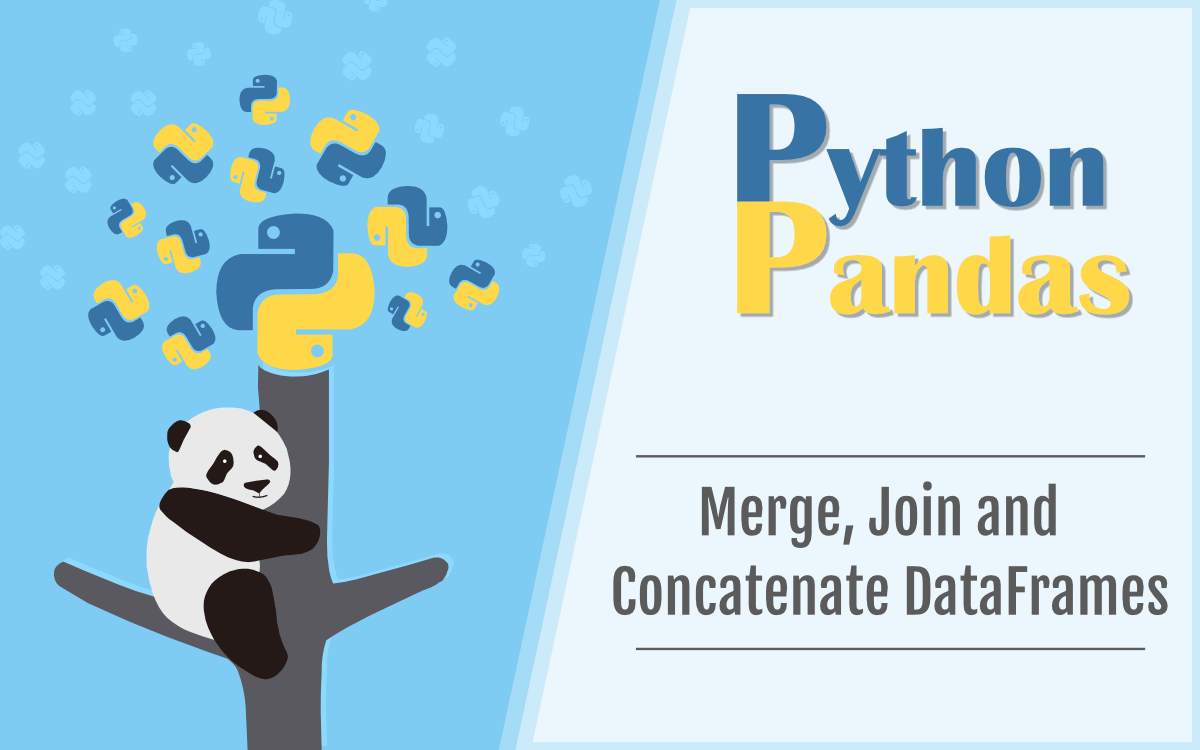

In [1]:
import pandas as pd
import numpy as np

In [2]:
courses = pd.read_csv('/content/courses.csv')
students = pd.read_csv('/content/students.csv')

nov = pd.read_csv('/content/reg-month1.csv')
dec = pd.read_csv('/content/reg-month2.csv')

# 1. Concat

In [3]:
nov.sample(2)

,student_id,course_id
2,18,6
18,23,3


In [4]:
dec.sample(2)

,student_id,course_id
15,1,9
0,3,5


In [5]:
# for vertically stacking the data
# problem of indexing -> repeating the indexes
pd.concat([nov, dec])

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [6]:
pd.concat([nov, dec]).shape

(53, 2)

In [7]:
# To avoid the problem of repeating index
registration = pd.concat([nov, dec], ignore_index=True)
registration

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [8]:
# keys -> Retains the original indexes as is and also provides the new indexes for additional info (Multiindex DataFrame)
# want to keep the original indexes intact
# provide additional index to differentiate
multi = pd.concat([nov, dec], keys=['nov', 'dec'])
multi

student_id  course_id
nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [9]:
# to access the nov month data
multi.loc['nov']

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [10]:
# to access a single row
multi.loc[('nov', 7)]

student_id    7
course_id     8
Name: (nov, 7), dtype: int64

In [11]:
# Horizontal Stacking
pd.concat([nov, dec], axis=1).head()

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9


# 2. Merge

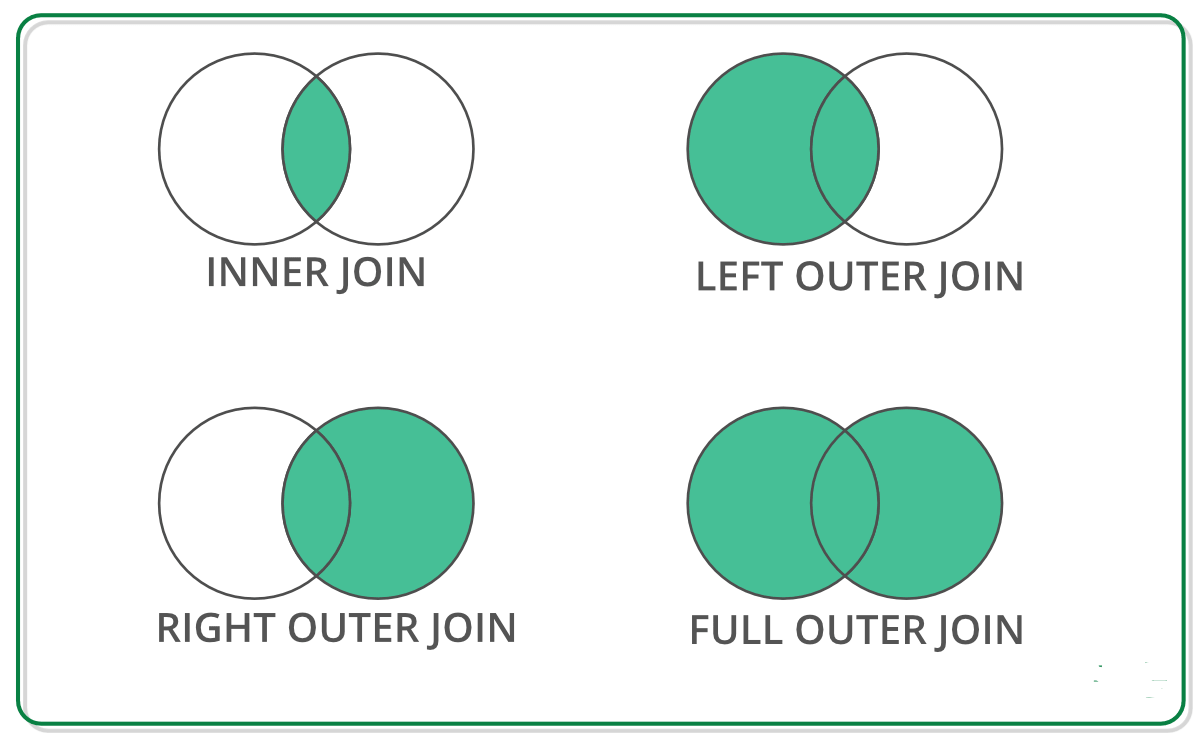

## i. Inner Join

In [12]:
students.merge(registration, how='inner', on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


## ii. Left Join

In [13]:
courses.merge(registration, how='left', on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


## iii. Right Join

In [14]:
temp = pd.DataFrame({'student_id':[26,27,28],
              'name': ['Ravi Chopra', 'Anika Dasgupta', 'Namrata Divan'],
              'partner': [27, 26, 21] } )

students = pd.concat([students, temp], ignore_index=True)

In [15]:
students.merge(registration, how='right', on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


## iv. Outer Join

In [16]:
students.merge(registration, how='outer', on='student_id').tail(10)

,student_id,name,partner,course_id
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,26,Ravi Chopra,27.0,NaN
58,27,Anika Dasgupta,26.0,NaN
59,28,Namrata Divan,21.0,NaN
60,42,NaN,NaN,9.0
61,50,NaN,NaN,8.0
62,38,NaN,NaN,1.0


In [17]:
# Alternate syntax
pd.merge(students, registration, how='outer', on='student_id').tail(6)

,student_id,name,partner,course_id
57,26,Ravi Chopra,27.0,NaN
58,27,Anika Dasgupta,26.0,NaN
59,28,Namrata Divan,21.0,NaN
60,42,NaN,NaN,9.0
61,50,NaN,NaN,8.0
62,38,NaN,NaN,1.0


# 3. Problems On The Course Data

### `Q.1` find the total revenue generated

In [18]:
courses.merge(registration, how='inner', on='course_id')['price'].sum()

154247

### `Q.2` find month by month revenue

In [19]:
temp_df = pd.concat([nov, dec], keys=['nov', 'dec']).reset_index()
temp_df.merge(courses, on='course_id').groupby('level_0')['price'].sum()

level_0
dec    65072
nov    89175
Name: price, dtype: int64

### `Q.3` print the registration table

 cols -> name -> course -> price

In [20]:
students.merge(registration, on='student_id').merge(courses, on='course_id')[['name', 'course_name', 'price']]

,name,course_name,price
0,Kailash Harjo,python,2499
1,Radha Dutt,python,2499
2,Pranab Natarajan,python,2499
3,Preet Sha,python,2499
4,Fardeen Mahabir,python,2499
5,Seema Kota,python,2499
6,Chhavi Lachman,python,2499
7,Shashank D’Alia,python,2499
8,Kailash Harjo,power bi,1899
9,Tarun Thaker,power bi,1899


### `Q.4` plot bar chart for revenue/course

<Axes: xlabel='course_name'>

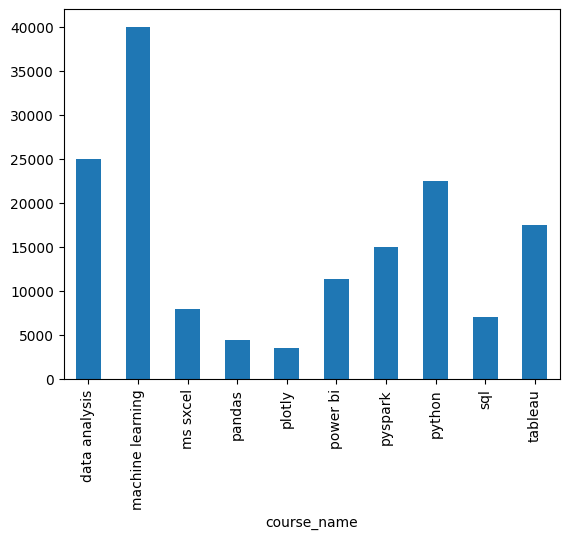

In [21]:
registration.merge(courses, on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

### `Q.5` find the students who enrolled in both the months


In [22]:
common_student_id = np.intersect1d(nov['student_id'], dec['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [23]:
students[students['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


### `Q.6` find course that got no enrollment

In [24]:
res = np.setdiff1d(courses['course_id'], registration['course_id'])
courses[courses['course_id'].isin(res)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


### `Q.7` find the students who did not enroll into any courses

In [25]:
res = np.setdiff1d(students['student_id'], registration['student_id'])
students[students['student_id'].isin(res)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Ravi Chopra,27
26,27,Anika Dasgupta,26
27,28,Namrata Divan,21


### `Q.8` print student name -> partner name for all enrolled students

In [26]:
# self join
students.merge(students, left_on= 'student_id', right_on='partner')[['name_x', 'name_y']]

,name_x,name_y
0,Kailash Harjo,Esha Butala
1,Esha Butala,Shashank D’Alia
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Nitika Chatterjee
4,Kusum Bahri,Radheshyam Dey
5,Lakshmi Contractor,Kusum Bahri
6,Tarun Thaker,Yasmin Palan
7,Radheshyam Dey,Aayushman Sant
8,Nitika Chatterjee,Tarun Thaker
9,Aayushman Sant,Lakshmi Contractor


### `Q.9` find the top 3 students who did most number enrollment

In [27]:
registration.merge(students, on='student_id').groupby(['student_id', 'name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

### `Q.10` find top 3 students who spend most amount of money on courses

In [28]:
students.merge(registration, on='student_id').merge(courses, on='course_id').groupby(['student_id', 'name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

# 4. Problems On IPL Dataset

In [29]:
matches = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

### `Q.1` # Find the top 3 stadium with highest sixes/match ratio


In [30]:
# runs info is in delivery dataset
# venue info is in matches
temp_df = delivery.merge(matches, left_on='match_id', right_on='id')

# filtering the rows in which batsman_run = 6
six_df = temp_df[temp_df['batsman_runs'] == 6]

# Number of sixes
num_sixes = six_df.groupby('venue')['venue'].count()

# number of matches
num_matches = matches['venue'].value_counts()

# sixes/match ratio
(num_sixes / num_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

### `Q.2` find orange cap holder of all the season

In [31]:
temp_df.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs', ascending=False).drop_duplicates('season', keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
